# 02_suprises_data

Xolani Sibande (April 2025)

In [ ]:
#| message: false
library(here)

here() starts at /Users/xolanisibande-dev/Papers/US_EM_MPS_spillover

Importing functions:

In [ ]:
source(here("notebooks", "functions", "fx_plot.R"))

Importing data:

In [ ]:
surprises_wide_tbl <- read_excel(here("notebooks","data", "factors2023.xlsx")) |> 
  mutate(
    Date = as.Date(paste0(year,"-", month, "-", day))
  ) |> 
  relocate(
    Date,
    .before = year
  ) |> 
  dplyr::select(
    -c(year, month, day, `-LSAP`)
  ) 

surprises_tbl <- 
  surprises_wide_tbl |> 
  pivot_longer(
    cols = -Date,
    names_to = "Series",
    values_to = "Value"
  )

EDA:

In [ ]:
surprises_tbl |> 
  group_by(Series) |> 
  skim()

  ---------------------------------------------------------------------------------------------------------------
  skim_variable   Series     n_missing   complete_rate   mean     sd      p0     p25    p50    p75   p100 hist
  --------------- -------- ----------- --------------- ------ ------ ------- ------- ------ ------ ------ -------
  Value           FFR                0               1      0   0.85   -5.67   -0.03   0.13   0.27   2.20 ▁▁▁▇▁

  Value           FG                 0               1      0   1.00   -3.91   -0.35   0.05   0.42   5.03 ▁▂▇▁▁

  Value           LSAP               0               1      0   0.59   -1.66   -0.20   0.00   0.21   5.32 ▂▇▁▁▁
  ---------------------------------------------------------------------------------------------------------------


Graphing:

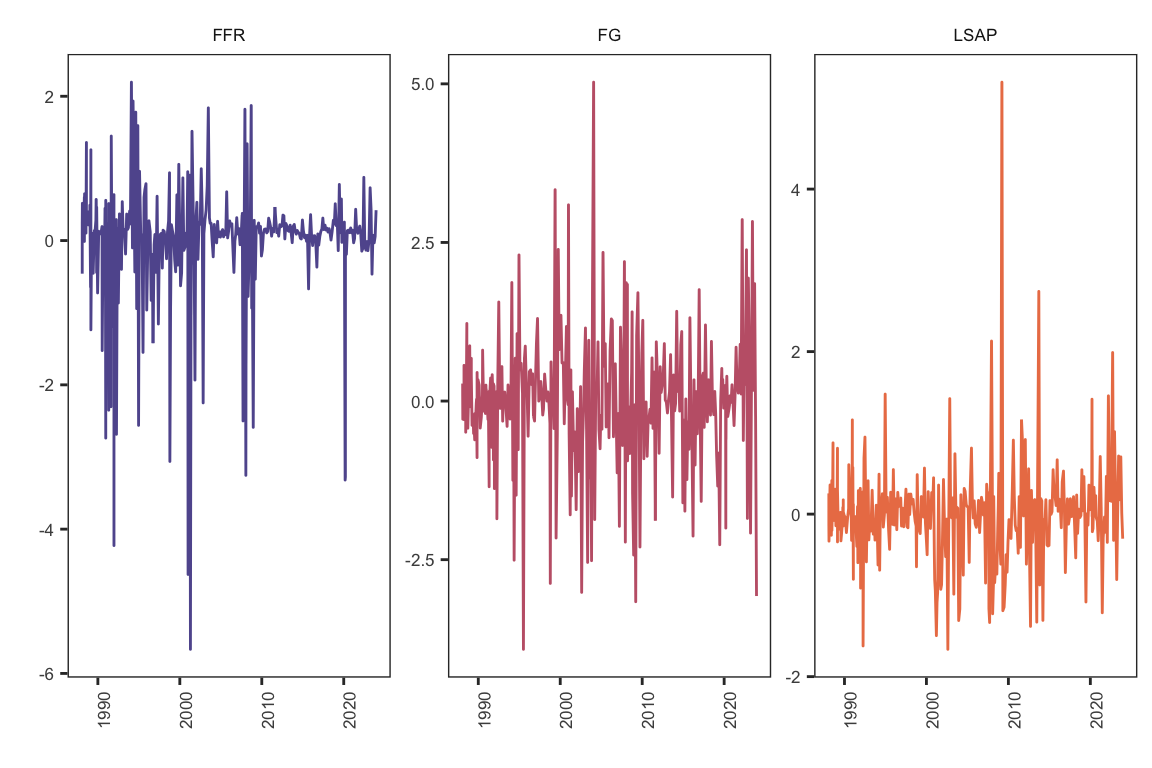

In [ ]:
#| label: fig-surprises
#| fig-cap: "Monetary policy surprises"
#| fig-align: center
#| fig-width: 6
#| fig-height: 4

surprises_gg <- 
  surprises_tbl |> 
  fx_plot(
    variables_color = 4
  )

surprises_gg

Export:

In [ ]:
artifacts_surprises_data <- list (
  surprises_tbl = surprises_tbl,
  surprises_wide_tbl = surprises_wide_tbl,
  surprises_gg = surprises_gg
)

write_rds(artifacts_surprises_data, file = here("notebooks", "outputs", 
                                                "artifacts_surprises_data.rds"))